In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
prefix="full/full"
mem = pd.read_csv(prefix+'-mem.tsv',sep="\t",header=0,index_col=0)

In [4]:
mem /= 1024*1024*1024

In [5]:
mem

,1,2,4,8,12,16,20,24,32,40,48,56,64,80,96,112,128
4,6.512608,12.059586,21.591564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.661469,12.851246,22.318550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,12.682487,22.244839,42.025288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,12.421593,23.781029,42.169594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,22.848938,44.119835,59.323147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,46.713463,60.884827,80.639721,99.785873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,47.041428,68.904411,82.424191,95.902897,113.108341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,45.786213,67.564907,83.381199,97.909966,121.230270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,66.915527,89.643036,110.671238,122.093765,156.469265,197.030678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,69.748047,91.741039,113.734901,130.779808,164.469860,199.764923,237.416401,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def mapint(s):
    try:
        return int(s)
    except ValueError:
        return 0
    
mem.index=map(mapint,mem.index)
mem.columns=map(mapint,mem.columns)

In [13]:
cores=[1,2,4,8,12,16,20,24,32,40,48,56]

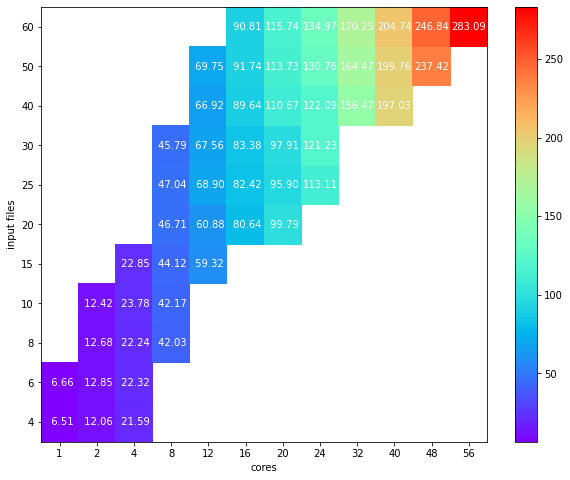

In [14]:
mem2=mem[cores]
 
_, ax = plt.subplots(figsize=(10,8))
plt.pcolor(mem2,cmap=plt.get_cmap('rainbow'))
plt.colorbar()
plt.xlabel("cores")
plt.ylabel("input files")
plt.xticks(np.arange(0.5, len(mem2.columns), 1),mem2.columns)
plt.yticks(np.arange(0.5, len(mem2.index), 1),mem2.index)
for i in range(len(mem2.index)):
    for j in range(len(mem2.columns)):
       ax.text(j+.5, i+.5, ("%6.2f" % mem2.iloc[i, j]),ha="center", va="center", color="w")
         
plt.show()

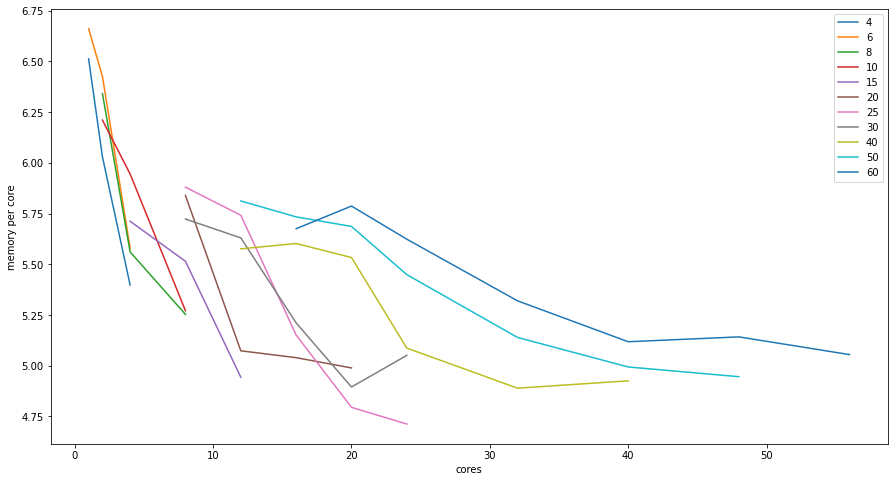

In [26]:
plt.figure(figsize=(15,8))
for i,m in mem2.iterrows():
    plt.plot(cores,m/cores,label=i)
plt.legend(mem2.index)
plt.xlabel('cores')
plt.ylabel('memory per core')
plt.show()

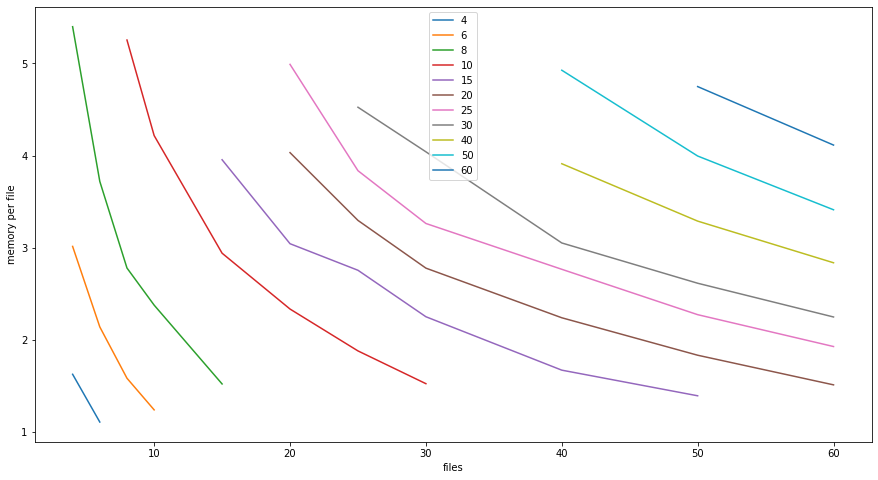

In [30]:
plt.figure(figsize=(15,8))
for i,m in mem2.iteritems():
    plt.plot(mem2.index,m/mem2.index,label=i)
plt.legend(mem2.index)
plt.xlabel('files')
plt.ylabel('memory per file')
plt.show()

In [32]:
time = pd.read_csv(prefix+'-time.tsv',sep="\t",header=0,index_col=0)
time.index=map(mapint,time.index)
time.columns=map(mapint,time.columns)
time

,1,2,4,8,12,16,20,24,32,40,48,56,64,80,96,112,128
4,3682.0,1892.0,1004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5729.0,2969.0,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,3988.0,2047.0,1086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,5144.0,3135.0,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,4476.0,2469.0,2228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,3471.0,2373.0,2367.0,1326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,4694.0,3623.0,2542.0,2549.0,2576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,4837.0,3720.0,2554.0,2534.0,2536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,4843.0,3796.0,2774.0,2663.0,2681.0,1592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,6169.0,4952.0,3965.0,3890.0,2747.0,2825.0,2670.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
time2=time[cores]

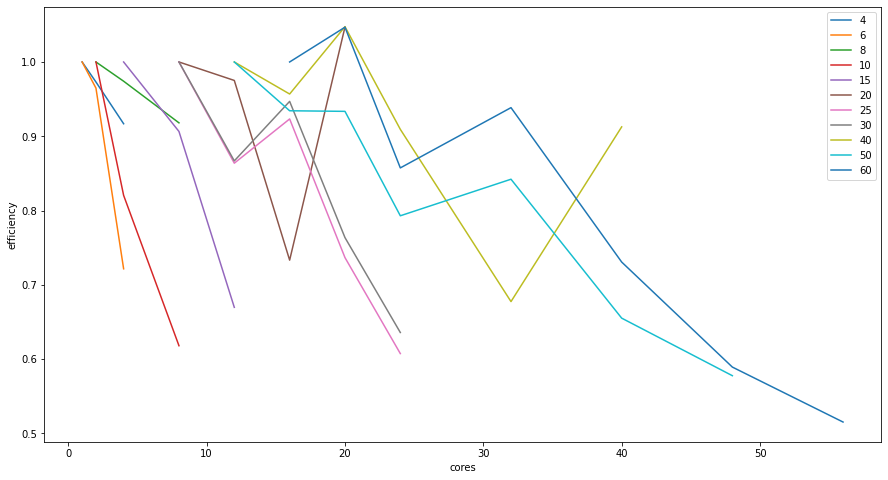

In [39]:
plt.figure(figsize=(15,8))
for i,m in time2.iterrows():
    j=0
    while pd.isna(m.iloc[j]):
        j+=1
        
    t0=m.iloc[j]
    n0=cores[j]
    
    plt.plot(cores,t0*n0/cores/m,label=i)
plt.legend(time2.index)
plt.xlabel('cores')
plt.ylabel('efficiency')
plt.show()